<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/Pruebas_con_nedel_mead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de Nelder Mead


Cuando se tiene un problema de optimización en ocasiones no es tan sencillo llegar a la solución de manera analítica. Ante ello se presentaron a lo largo del plan de estudios de la Licenciatura en Ingeniería Matemática varias maneras de resolverlos, entre los cuales nos conciernen los métodos de aproximmación vistos en lso cursos de métodos numéricos y optimización.

A partir de los aprendizajes adquiridos en dichas asignaturas se tiene un amplio repertorio de técnicas y métoos para la solución de diversos problemas de minimización (o maximización).

Como complemento se presentará a lo largo de este notebook mi implementaciónb del método de Nelder y Mead.

A partir del problema de optimización:
$$ min \ f(x) = z $$
donde $ x ∈ ℝ^n $, es decir, $ x = \left(\begin{array}{c} x_1 \\ x_2 \\.\\.\\.\\x_n \end{array}\right) $ con $x_i∈ℝ$, para $i = 1, 2, ..., n$


##El método Nelder Mead

Para dar inicio al método se toma un conjunto de $n+1$ puntos, donde $n$ es la dimensión del domunio de la función; en otras palabras, $n$ es el número de variables que la función $f$ toma de entrada. Estos $n+1$ puntos serán los vértices politopo convexo de dimensión n.

Este método se compone de 5 pasos, los cuales tienen diversas funcionalidades dentro del método.

\\
1.- Ordenar:

Lo primero en cada iteración del método será ordenan los n+1 puntos del mejor (menor en caso de minimizar y mayor en caso de maximizar) al peor con base en sus evaluaciones en la función objetivo ($f$).

Para el ejercicio que estamos considerando $( min \ f(x) = z )$ se ordenará del menor al mayor, es decir.

$$ f(x_1) < f(x_2) < ... < f(x_n) < f(x_{n+1}) $$

de manera que el mejor punto será el primero $(x_1)$ y el peor derá el último $(x_{n+1})$.

\\
2.- Reflexión:

Luego de ordenar los puntos, se va a desplazar el peor de los puntos en dirección al resto de los puntos, para esto se calcula el punto medio de los $n$ mejores puntos.
$$ \bar{x} = \sum_{i=1}^{n}\frac{x_i}{n} $$
Y luego se calcula un punto reflejado $(x_r)$ del peor de los puntos sobre el punto medio, es decir:
$$ x_r = \bar{x} + (\bar{x} - x_{n+1}) = 2\bar{x} - x_{n+1} $$

Luego evaluamos el punto de reflexión $(x_r)$ en la función objetivo con la finalidad de compararlo con los demás puntos. Con lo que resultan tres casos:

a) $f(x_r) < f(x_1)$: Se ha mejorado mucho, ha superado al mejor punto. Por lo que se procede a la expansión (paso 3).

b) $f(x_1) < f(x_r) < f(x_{n+1})$: Se ha mejorado con respecto del peor punto. Por lo que se sustituye el peor punto $(x_{n+1})$ por el reflejado $(x_r)$.

c) $f(x_r) \geq f(x_{n+1})$: No se ha mejorado con respecto del peor punto. Con lo que se debe ir a la contracción (paso 4).

\\
3.- Expansión:

Se parte del hecho de que el punto de reflexión $(x_r)$ ha mejorado con respecto del peor punto $(x_{n+1})$, por lo que siguiendo la misma idea de mejorar el peor de los vertices, se extiende la reflexión con base en el punto medio de lo mejores $n$ puntos, es decir:
$$ x_e = \bar{x} + 2(\bar{x} - x_{n+1}) = 3\bar{x} - 2x_{n+1} $$

Posteriormente se evalua la función objetivo en el punto de expansión y se compara con los demás puntos. Lo cual resultaen dos casos:

a) $f(x_e) < f(x_r)$: Se ha mejorado con respecto del punto de reflexión. Por lo que se sustituye el peor punto $(x_{n+1})$ por el extendido $(x_e)$.

b) $f(x_e) \geq f(x_r)$: No se ha mejorado con respecto del punto reflejado. Por lo que se sustituye el peor punto $(x_{n+1})$ por este $(x_r)$.

\\
4.- Contracción:

Como el punto de reflexión no ha mejorado con respecto al peor punto, se va a acercar el punto de reflexión más al punto medio $(\bar{x})$. Para ello se calculan dos puntos de contracción:

$$ x_{c+} = \bar{x} + 0.5(\bar{x} - x_{n+1}) = 1.5\bar{x} - 0.5x_{n+1} $$

$$ x_{c-} = \bar{x} - 0.5(\bar{x} - x_{n+1}) = 0.5\bar{x} + 0.5x_{n+1} = \frac{\bar{x} + x_{n+1}}{2} $$

Con lo que se evaluan estos dos puntos en la función objetivo y se compara conrespecto al resto de $n$ puntos. Resultan tres casos.

a) $ f(x_{c+}) < f(x_{n+1}) \quad \textrm{y} \quad f(x_{c+}) < f(x_{c-}) $: El punto $x_{c+}$ mejora al peor y es mejor que el punto $x_{c-}$. Por lo cual se sustituye el peor punto $x_{n+1}$ por $x_{c+}$.

b) $ f(x_{c-}) < f(x_{n+1}) \quad \textrm{y} \quad f(x_{c-}) < f(x_{c+}) $: El punto $x_{c-}$ mejora al peor y es mejor que el punto $x_{c-}$. Por lo cual se sustituye el peor punto $x_{n+1}$ por $x_{c-}$.

c) $ f(x_{c+}) \geq f(x_{n+1}) \quad \textrm{y} \quad f(x_{c-}) \geq f(x_{n+1}) $: Ningún punto de contracción ha mejorado al peor. Por lo que se para a la reducción (paso 5).


5.- Reducción: Como no hemos mejorado el peor punto $(x_{n+1})$ con ninguno de los anteriores pasos vamos a acercar todos los puntos hacia el mejor, en otras palabras, vamos a realizar una combinación lineal de cada uno de los puntos (a excepción del mejor) para que la distancia entre estos y el mejor se vea reducida.

$$ x_i = x_0 - 0.5(x_0 - x_i) \ \textrm{para } i = 2,3,...,n,n+1$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from numba.typed import List

#Nelder

In [ ]:
def f(x):
  return  0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]

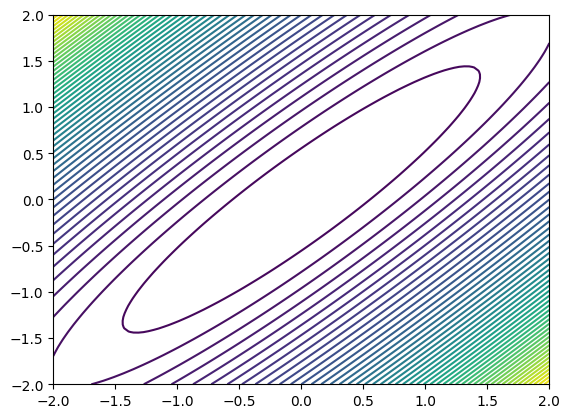

In [ ]:
a = np.linspace(-2, 2, 100)

x,y = np.meshgrid(a,a)
z = f([x,y])

plt.contour(x, y, z, levels = 50)
plt.show()

In [ ]:
def op_Nelder_Mead_graf(f, lx0, tol, max_iter):
  a = np.linspace(-2, 2, 100)
  a, b = np.meshgrid(a,a)
  z = f([a,b])

  lx = np.array(lx0)
  n = len(lx)
  lf = []
  for i in range(n):
    lf.append(f(lx[i]))
  iter = 0
  while (not np.allclose(lf[0], lf[1], atol = tol)) and iter < max_iter:
    plt.contour(a, b, z, levels = 50)
    plt.plot(np.append(lx[:, 0], lx[0, 0]),np.append(lx[:, 1], lx[0, 1]), color = 'k')
    plt.show()
    iter += 1

    #----------------------------------ordenar----------------------------------
    lx = lx[np.argsort(lf)]
    lf.sort()

    #---------------------------encontrar punto medio---------------------------
    suma = np.sum(lx[:-1], 0)
    c = suma/(n-1)

    #---------------------------------reflejar----------------------------------

    x = c + (c - lx[-1])

    fx = f(x)
    #---------------------------------expansion---------------------------------
    if fx < lf[0]:
      xx = c + 2*(c - lx[-1])
      fxx = f(xx)
      if fxx < lf[0]:
        lx[-1] = xx
        lf[-1] = fxx
      else:
        lx[-1] = x
        lf[-1] = fx
    elif fx < lf[-2]:
      lx[-1] = x
      lf[-1] = fx
    else:
      #-------------------------------contraccion-------------------------------
      x1 = c + 0.5*(c - lx[-1])
      x2 = c - 0.5*(c - lx[-1])
      f1 = f(x1)
      f2 = f(x2)
      if f1 < lf[-1] and f1 < f2:
        lx[-1] = x1
        lf[-1] = f1
      elif f2 < lf[-1] and f2 < f1:
        lx[-1] = x2
        lf[-1] = f2
      #--------------------------------reduccion--------------------------------
      else:
        for i in range(1,n):
          lx[i] = lx[0] + 0.5*(lx[i] - lx[0])
          lf[i] = f(lx[i])

    print(lx)
    print(lf)
  return lx, lf

l = [[2.0, 0], [2, 7], [-12, 1]] #Puntos iniciales
a, b = op_Nelder_Mead_graf(f, l, 10**-8, 1000)
print(a,b)

In [ ]:
l = [[1, 0], [2, 1], [-1, 1]]
l.sort(reverse = True)
print(l)

[[2, 1], [1, 0], [-1, 1]]


In [ ]:
def op_NM(f, lx0, tol, max_iter):
  lx = np.array(lx0)
  n = len(lx)
  lf = []
  for i in range(n):
    lf.append(f(lx[i]))
  iter = 0
  while (not np.allclose(lf[0], lf[1], rtol = tol)) and iter < max_iter:
    print(lx)
    print(lf)
    iter += 1

    #----------------------------------ordenar----------------------------------
    lx = lx[np.argsort(lf)]
    lf.sort()

    #---------------------------encontrar punto medio---------------------------
    suma = np.sum(lx[:-1], 0)
    c = suma/(n-1)

    #---------------------------------reflejar----------------------------------

    x = c + (c - lx[-1])

    fx = f(x)
    #---------------------------------expansion---------------------------------
    if fx < lf[0]:
      xx = c + 2*(c - lx[-1])
      fxx = f(xx)
      if fxx < lf[0]:
        lx[-1] = xx
        lf[-1] = fxx
      else:
        lx[-1] = x
        lf[-1] = fx
    elif fx < lf[-2]:
      lx[-1] = x
      lf[-1] = fx
    else:
      #-------------------------------contraccion-------------------------------
      x1 = c + 0.5*(c - lx[-1])
      x2 = c - 0.5*(c - lx[-1])
      f1 = f(x1)
      f2 = f(x2)
      if f1 < lf[-1] and f1 < f2:
        lx[-1] = x1
        lf[-1] = f1
      elif f2 < lf[-1] and f2 < f1:
        lx[-1] = x2
        lf[-1] = f2
      #--------------------------------reduccion--------------------------------
      else:
        for i in range(1,n):
          lx[i] = lx[0] - 0.5*(lx[0] - lx[i])
          lf[i] = f(lx[i])

  return lx, lf

In [ ]:
def g(x):
  return  sum(abs(x))

l = [[7, 0.7, 1], [2, 1.2, -17], [7.1, -2, -1], [1.1, -4, 10]]
a, b = op_NM(g, l, 10**-10, 100)
print(a)
print(b)

print(f(np.round(a[0], 0)))

[[  7.    0.7   1. ]
 [  2.    1.2 -17. ]
 [  7.1  -2.   -1. ]
 [  1.1  -4.   10. ]]
[8.7, 20.2, 10.1, 15.1]
[[ 7.          0.7         1.        ]
 [ 7.1        -2.         -1.        ]
 [ 1.1        -4.         10.        ]
 [ 3.53333333 -0.28333333 -6.83333333]]
[8.7, 10.1, 15.1, 10.649999999999999]
[[ 7.          0.7         1.        ]
 [ 7.1        -2.         -1.        ]
 [ 3.53333333 -0.28333333 -6.83333333]
 [ 3.48888889 -2.26388889  3.86111111]]
[8.7, 10.1, 10.649999999999999, 9.613888888888889]
[[ 7.          0.7         1.        ]
 [ 3.48888889 -2.26388889  3.86111111]
 [ 7.1        -2.         -1.        ]
 [ 4.69814815 -0.73564815 -2.77314815]]
[8.7, 9.613888888888889, 10.1, 8.206944444444442]
[[ 4.69814815 -0.73564815 -2.77314815]
 [ 7.          0.7         1.        ]
 [ 3.48888889 -2.26388889  3.86111111]
 [ 0.98703704  1.70046296  4.08796296]]
[8.206944444444442, 8.7, 9.613888888888889, 6.7754629629629655]
[[ 0.98703704  1.70046296  4.08796296]
 [ 4.69814815 -0.7356